In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



# Preprocessing 

In [ ]:
#Reading The Data File
PATH_TO_DATA ='/content/drive/MyDrive/Colab Notebooks/sonar.all-data'
df = pd.read_csv(PATH_TO_DATA,header=None)
Data=df.values
# split into input (X) and output (Y) variables
X = Data[:,:60]
# encode class values as integers
Y = Data[:,60]
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y).astype(float)

In [ ]:
from sklearn import preprocessing
 #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
df = pd.DataFrame(x_scaled)
Data1=df.values
# split into input (X) and output (Y) variables
X1 = Data1[:,:60]
y = encoded_Y.copy().reshape(-1,1)

Fold #1
Fold #2
Fold #3
Fold #4
Fold #5
Excecution Time is  10.437964677810669


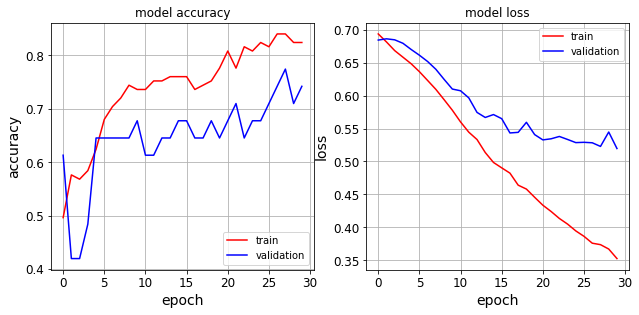

In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import time
X, X_test, y, y_test = train_test_split(X1, y, test_size=0.25, random_state=42) # first split Test and train 20% test

# Cross-Validate
kf = KFold(5, shuffle=True, random_state=42) # Use for KFold classification
    
# oos_y = []
# oos_pred = []
start=time.time()
fold = 0
for train, val in kf.split(X):
    fold+=1
    print(f"Fold #{fold}")
        
    x_train = X[train]
    y_train = y[train]
    x_val = X[val]
    y_val = y[val]

    # #tanh
    # model = Sequential()
    # model.add(Dense(20, activation='relu', input_shape=(60,)))	#Hidden Layer 1
    # model.add(Dense(512, activation='relu'))	#Hidden Layer 2
    # model.add(Dense(256, activation='relu'))	#Hidden Layer 3
    # model.add(Dense(1, activation='sigmoid')) #Last layer with one output per class
    # model.summary()


    
    model = Sequential()
    model.add(Dense(20, activation='relu', input_shape=(60,)))	#Hidden Layer 1
    model.add(Dense(256, activation='relu'))	#Hidden Layer 2
    model.add(Dense(1, activation='sigmoid')) #Last layer with one output per class
    # # model.summary()
 
    # model = Sequential()
    # model.add(Dense(100, activation='relu', input_shape=(60,)))	#Hidden Layer 1
    # model.add(Dense(1024, activation='relu'))	#Hidden Layer 2
    # model.add(Dense(1, activation='sigmoid')) #Last layer with one output per class

    opt='adam'
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy']) 

    history=model.fit(x_train,y_train,validation_data=(x_val,y_val),verbose=0 ,epochs=30,batch_size=32)  #32 64 128

end=time.time()
print("Excecution Time is ",end-start)
# Plotting Metrics
# Plot the Accuracy Curves
plt.figure(figsize=(16, 10))
plt.subplot(231)
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

# Plot the Loss Curves
plt.subplot(232)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()

2/2 [==============================] - 0s 5ms/step - loss: 0.3474 - accuracy: 0.8077
confusion matrix=
 [[23  7]
 [ 3 19]]
              precision    recall  f1-score   support

         0.0       0.88      0.77      0.82        30
         1.0       0.73      0.86      0.79        22

    accuracy                           0.81        52
   macro avg       0.81      0.82      0.81        52
weighted avg       0.82      0.81      0.81        52



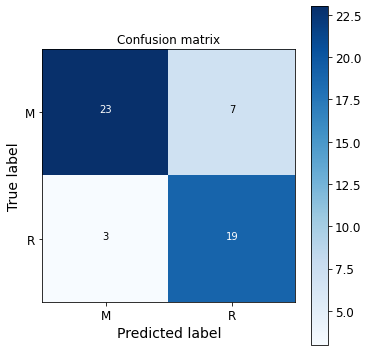

In [ ]:
# Prediction Labels
Y_pred = model.predict(X_test)
model.evaluate(X_test,y_test)


#Initial a threshhold for last layer
y_pred=np.zeros(len(Y_pred))
for i in range(len(y_pred)):
  if Y_pred[i]>0.5:
    y_pred[i]=1
  else:
    y_pred[i]=0


from sklearn.metrics import confusion_matrix , classification_report
# Confusion Matrix
class_names=['M','R']
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n",confusion_mtx)

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(confusion_mtx, class_names)    

print(classification_report(y_test,y_pred))

# import seaborn as sns
# plt.figure()
# sns.heatmap(confusion_mtx, annot=True)   